# Queueing M/M/1 with FIFO

In [1]:
using Distributions

We define a type to store customer wait and service information

In [2]:
type QueueCustomer
    time::Float64  #When do I arrrive
    service_time::Float64 #How much time it take to process my request
    wait_time::Float64 #How much time I spent waiting in the queue
    ID::Int
end 

We will construct the simplest queueing model, we will use an [M/M/1 queue](https://en.wikipedia.org/wiki/M/M/1_queue)


In [3]:
λ=3 # Arrival rate
μ=2  #Service rate 
interarrival_dist=Exponential(1/λ)
proccessing_dist=Exponential(1/μ)

Distributions.Exponential{Float64}(θ=0.5)

We created an arrival queue

In [4]:
arrival_queue=Array(QueueCustomer,0)

0-element Array{QueueCustomer,1}

We sample from the distribution and fill the queue 

In [5]:
t=0
for i=1:1000
    next_custmer_at=rand(interarrival_dist)
    t+=next_custmer_at
    service_time=rand(proccessing_dist)
    qc=QueueCustomer(t,service_time,Inf,i)
    push!(arrival_queue,qc)
end

In [6]:
arrival_queue

1000-element Array{QueueCustomer,1}:
 QueueCustomer(0.616502,0.0274407,Inf,1) 
 QueueCustomer(1.00541,2.07626,Inf,2)    
 QueueCustomer(1.26918,0.195218,Inf,3)   
 QueueCustomer(1.60812,0.0197584,Inf,4)  
 QueueCustomer(1.9533,0.521602,Inf,5)    
 QueueCustomer(2.38371,0.312518,Inf,6)   
 QueueCustomer(3.58133,0.102057,Inf,7)   
 QueueCustomer(3.78192,0.20609,Inf,8)    
 QueueCustomer(5.77321,0.0197478,Inf,9)  
 QueueCustomer(6.2143,0.141659,Inf,10)   
 QueueCustomer(6.43037,0.16686,Inf,11)   
 QueueCustomer(6.46644,0.687845,Inf,12)  
 QueueCustomer(7.20296,0.68196,Inf,13)   
 ⋮                                       
 QueueCustomer(326.636,1.16774,Inf,989)  
 QueueCustomer(327.722,0.207493,Inf,990) 
 QueueCustomer(328.131,0.229473,Inf,991) 
 QueueCustomer(328.226,0.346871,Inf,992) 
 QueueCustomer(328.695,0.525292,Inf,993) 
 QueueCustomer(328.878,2.20177,Inf,994)  
 QueueCustomer(328.991,0.766629,Inf,995) 
 QueueCustomer(329.462,0.436131,Inf,996) 
 QueueCustomer(329.812,0.329525,Inf,997

Now we proccess the queue 

In [7]:
serviced_customers=Array(QueueCustomer,0)
t=arrival_queue[1].time #Time of starting processing 
for i=1:1000
    qc=shift!(arrival_queue)
    t=max(t,qc.time) #Time always moves forward, try modifying this line to understand impact
    wait_time=t-qc.time
    qc.wait_time=wait_time
    push!(serviced_customers,qc)
    t+=qc.service_time
end 

In [8]:
serviced_customers

1000-element Array{QueueCustomer,1}:
 QueueCustomer(0.616502,0.0274407,0.0,1)     
 QueueCustomer(1.00541,2.07626,0.0,2)        
 QueueCustomer(1.26918,0.195218,1.81249,3)   
 QueueCustomer(1.60812,0.0197584,1.66877,4)  
 QueueCustomer(1.9533,0.521602,1.34334,5)    
 QueueCustomer(2.38371,0.312518,1.43454,6)   
 QueueCustomer(3.58133,0.102057,0.549434,7)  
 QueueCustomer(3.78192,0.20609,0.450902,8)   
 QueueCustomer(5.77321,0.0197478,0.0,9)      
 QueueCustomer(6.2143,0.141659,0.0,10)       
 QueueCustomer(6.43037,0.16686,0.0,11)       
 QueueCustomer(6.46644,0.687845,0.13079,12)  
 QueueCustomer(7.20296,0.68196,0.0821119,13) 
 ⋮                                           
 QueueCustomer(326.636,1.16774,157.386,989)  
 QueueCustomer(327.722,0.207493,157.468,990) 
 QueueCustomer(328.131,0.229473,157.267,991) 
 QueueCustomer(328.226,0.346871,157.401,992) 
 QueueCustomer(328.695,0.525292,157.278,993) 
 QueueCustomer(328.878,2.20177,157.621,994)  
 QueueCustomer(328.991,0.766629,159.71,995)

We are now ready to explore properties of the systems, such service time distritubion, average queueu wait time, etc...

<span style="color:red">*The above was just a cut and paste from the last lecture*</span>

The following exposition, follows the style in the following [introductory book](http://irh.inf.unideb.hu/~jsztrik/education/16/SOR_Main_Angol.pdf).

## Wait time distribution

In [9]:
wait_time_list=[s.wait_time for s in serviced_customers];
mean_wait_time=mean(wait_time_list)

76.43267061306938

So in that model if we are working on per-minute bases for a time scale, in system were customers arrive at a rate of three customers per minute, and are serviced as a rate of two per minute, we get a sample average wait time of _82 minutes!_. If you are having a sandwich for lunch, that is long wait. 

To get a better insight, perhaps it is good to look at the distribution. 

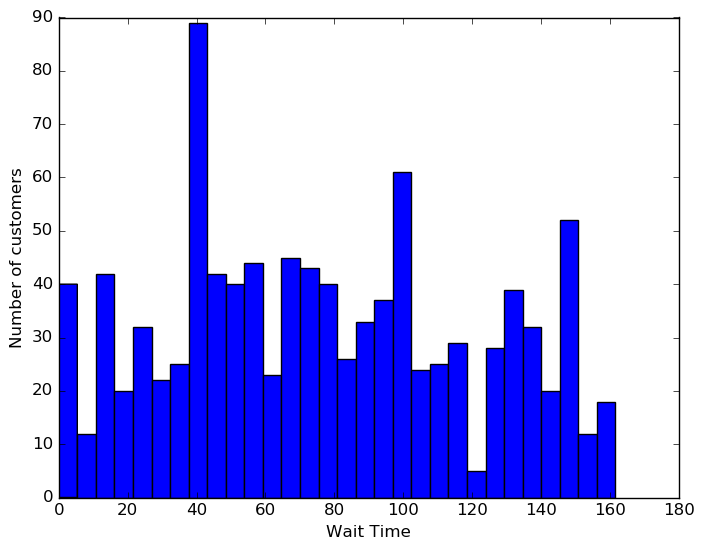

In [10]:
using PyPlot 
ax=axes();
ax[:hist](wait_time_list,30); ylabel("Number of customers"); xlabel("Wait Time");

The distribution seem slight noisy with a peek in the range of 90-100 minutes. We are not sure that this is the true representation of the _long term_ behavior. For that, we have to this queuing simulation longer. 

For that we start try to generalize out previous loops into a function. 

In [11]:
function MM1_que_sim(numCustomers,λ,μ)
    interarrival_dist=Exponential(1/λ)
    proccessing_dist=Exponential(1/μ)
    arrival_queue=Array(QueueCustomer,0)
    t=0
    for i=1:numCustomers
        next_custmer_at=rand(interarrival_dist)
        t+=next_custmer_at
        service_time=rand(proccessing_dist)
        qc=QueueCustomer(t,service_time,Inf,i)
        push!(arrival_queue,qc)
    end
    serviced_customers=Array(QueueCustomer,0)
    t=arrival_queue[1].time #Time of starting processing 
    for i=1:numCustomers
        qc=shift!(arrival_queue)
        t=max(t,qc.time) #Time always moves forward, try modifying this line to understand impact
        wait_time=t-qc.time
        qc.wait_time=wait_time
        push!(serviced_customers,qc)
        t+=qc.service_time
    end 
    wait_time_list=[s.wait_time for s in serviced_customers];
end

MM1_que_sim (generic function with 1 method)

In [12]:
wait_time_list=MM1_que_sim(100_000,3,2)
mean_wait_time=mean(wait_time_list)

8416.65268602845

What is going on here? The mean wait time is increasing.

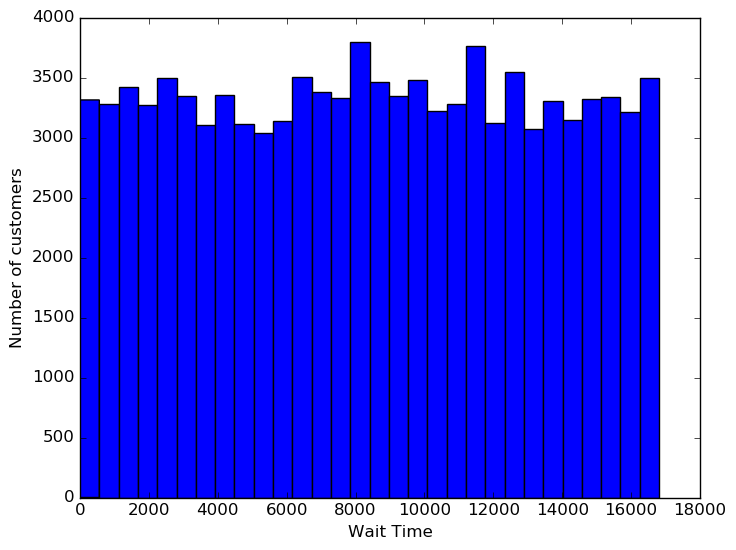

In [13]:
ax=axes();
ax[:hist](wait_time_list,30); ylabel("Number of customers"); xlabel("Wait Time");

On further consideration, we realize that this is not too surprising. The **traffic intensity** is 
$$\varrho=\frac{\lambda}{\mu}=\frac{3}{2} > 1$$

The means that the system is overloaded! The queue will just get progressively longer and longer.  
Looking again at the distribution, we realize the the variations in distribution of wait times are less pronounced that in the previous plot.  We can try to push this even further. 

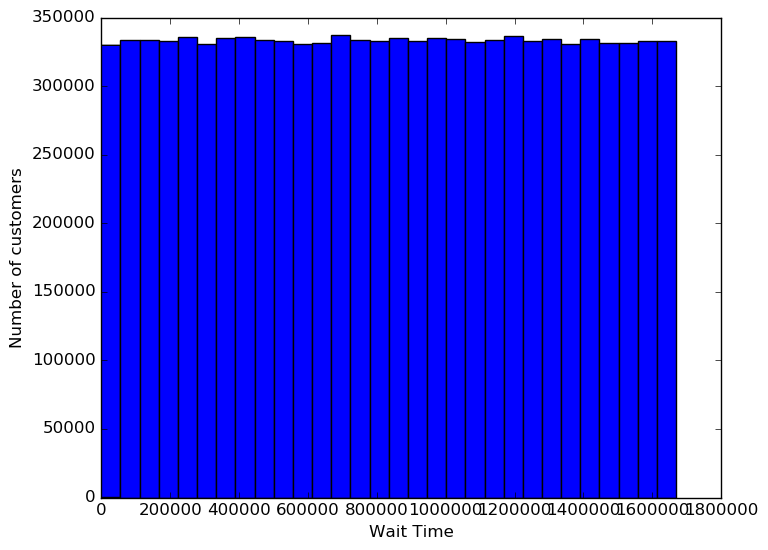

In [14]:
wait_time_list=MM1_que_sim(10_000_000,3,2) # 10 million 
ax=axes();
ax[:hist](wait_time_list,30); ylabel("Number of customers"); xlabel("Wait Time");

We see here that the spread is more even, suggesting a uniform distribution across the wait time ranges. 

<span style="color:darkgreen">_Why? Bonus points for the first few who get this right._</span>

Now we would like to discuss simulation efficiency. We start by profiling the execution time using the `@time` macro. 


In [15]:
@time MM1_que_sim(10_000_000,3,2);

  2.755888 seconds (60.00 M allocations: 1.519 GB, 31.37% gc time)


This shows there was 1.97 GB off memory allocations going in creating out massive arrays for processing our customers. This is results in about 60% of the processing time being spent on garbage collection (`gc time`). 

Can we do better? We can if we eliminate such massive lists. But how? We could do that simply generating a new customer  only when the service station is ready receive the next customer. Let's do that.

### Faster Simulation

In [16]:
function MM1_que_sim_fast(numCustomers,λ,μ)
    interarrival_dist=Exponential(1/λ)
    proccessing_dist=Exponential(1/μ)
    arrival_queue=Array(QueueCustomer,0)
    num_of_serviced_customers=0
    t_service=0.0 #Time wrt the service station
    t_queue=0.0 # Time wrt to queue 
    wait_time_list=Float64[] #The wait time list 
    i=0
    while num_of_serviced_customers<numCustomers #At every iteration we will service one customer and build the wait queue
        if isempty(arrival_queue) #Fill the queue up to the time at service station
            while t_queue<=t_service
                next_custmer_at=rand(interarrival_dist)
                t_queue+=next_custmer_at
                service_time=rand(proccessing_dist)
                i+=1
                qc=QueueCustomer(t_queue,service_time,Inf,i)
                push!(arrival_queue,qc)
            end
        end
        qc=shift!(arrival_queue)
        t_service=max(t_service,qc.time) 
        wait_time=t_service-qc.time
        push!(wait_time_list,wait_time)
        t_service+=qc.service_time
        num_of_serviced_customers+=1
    end
    wait_time_list
end

MM1_que_sim_fast (generic function with 1 method)

Note that in the above code only made use of one queue, the `arrival_queue`. Lets test it now.

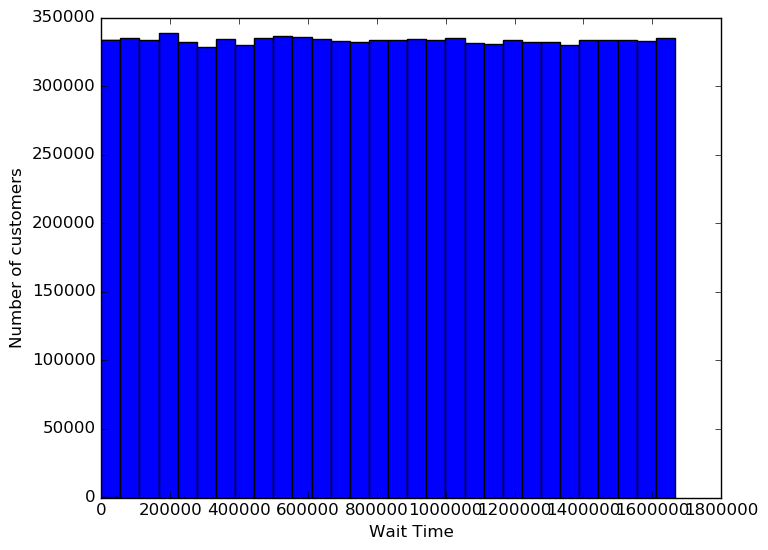

In [17]:
wait_time_list=MM1_que_sim_fast(10_000_000,3,2) # 10 million 
ax=axes();
ax[:hist](wait_time_list,30); ylabel("Number of customers"); xlabel("Wait Time");

Now we 

In [18]:
@time MM1_que_sim_fast(10_000_000,3,2);

  1.071753 seconds (12.43 M allocations: 762.893 MB, 34.27% gc time)


Note here that the memory allocations have gone down very substantially and so did the execution time. 

# Queueing M/M/2 with FIFO

For an analyst studying this problem, it is obvious that more service stations are needed. We have to modify the code accordingly. Here it might good opportunity to make use of [Julia's coroutines](https://docs.julialang.org/en/stable/manual/control-flow/#man-tasks). This, not only makes our program structure simpler, it generally much faster that filling and emptying arrays, and is also extensible to any number of service stations. 

In [19]:
function customer_queue(numCustomers,λ,μ)
    t=0.0
    interarrival_dist=Exponential(1/λ)
    proccessing_dist=Exponential(1/μ)
     for i=1:numCustomers
        next_custmer_at=rand(interarrival_dist)
        t+=next_custmer_at
        service_time=rand(proccessing_dist)
        qc=QueueCustomer(t,service_time,Inf,i)
        produce(qc)
    end
end

customer_queue (generic function with 1 method)

In [20]:
function service_processing_two_stations(queue_task::Task)
    t_next_customer_at_1=0.0
    t_next_customer_at_2=0.0
    wait_time_list=Float64[]
    for qc::QueueCustomer in queue_task
        if t_next_customer_at_2<t_next_customer_at_1
            t_next_customer_at_2=max(t_next_customer_at_2,qc.time) 
            wait_time=t_next_customer_at_2-qc.time
            push!(wait_time_list,wait_time)
            t_next_customer_at_2+=qc.service_time
        else
            t_next_customer_at_1=max(t_next_customer_at_1,qc.time) 
            wait_time=t_next_customer_at_1-qc.time
            push!(wait_time_list,wait_time)
            t_next_customer_at_1+=qc.service_time
        end
    end
    wait_time_list
end

service_processing_two_stations (generic function with 1 method)

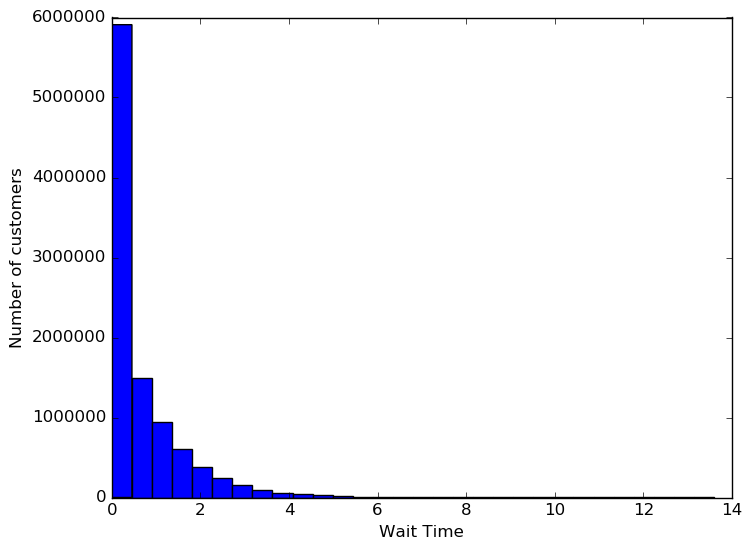

In [21]:
qt=@task customer_queue(10_000_000,3,2) # 10 million 
wait_time_list=service_processing_two_stations(qt) 
ax=axes();
ax[:hist](wait_time_list,30); ylabel("Number of customers"); xlabel("Wait Time");

The two service stations, really improved things. We could look at the mean wait time

In [22]:
mean(wait_time_list)

0.6422531807428021

Now it takes around 0.6 minutes to service each customer. Obviously that the queue is not building up like we saw before. A generalized of **traffic intensity** for $c$ [service stations](https://en.wikipedia.org/wiki/M/M/c_queue#Number_of_customers_in_the_system) is 
$$\varrho=\frac{\lambda}{c\mu}=\frac{3}{4} < 1$$
So we are sure here that the queue will not build up indefinitely here.  

Now we can look at the performance aspects of our new coding approach, using coroutines. 

In [23]:
qt=@task customer_queue(10_000_000,3,2) # 10 million 
@time service_processing_two_stations(qt);

  9.207508 seconds (10.00 M allocations: 474.774 MB, 1.48% gc time)


This seems a bit slow. But is it is clear that the memory allocation here is low. However, it is down to the fact the that using coroutines induces a bit of an overhead. 

More advanced users of Julia, look into their code for [type-stability](http://www.johnmyleswhite.com/notebook/2013/12/06/writing-type-stable-code-in-julia/). A useful macro here is [`@code_warntype`](https://docs.julialang.org/en/stable/manual/performance-tips/#code-warntype). 

If you run 
```julia
@code_warntype service_processing_two_stations(qt);
```

You should notice the following two lines

<div style="font-family:monospace">
SSAValue(4) = $(Expr(:invoke, LambdaInfo for consume(::Task), :(Base.consume), :(queue_task)))
      (Core.setfield!)(queue_task::Task,:result,SSAValue(4))::<font color="red">Any</font> <br>
         
       ....<br>
SSAValue(11) = (Core.getfield)(queue_task::Task,:result)::<font color="red">Any</font>
</div>

The type `Any` indicate that Julia can not infer the return type and hence some type inference is required. 

Another alternative approach here is to use [generators](https://docs.julialang.org/en/stable/manual/arrays/?highlight=comprehension#generator-expressions) and [closures](https://docs.julialang.org/en/stable/devdocs/functions/#closures).

We see here that there are two lines, that are marked `Any` type in the end. 

In [24]:
function customer_queue_gen(numCustomers,λ,μ)
    t=0.0
    interarrival_dist=Exponential(1/λ)
    proccessing_dist=Exponential(1/μ)
    function f(i)  #Our closure that will be used in the returned generator
        next_custmer_at=rand(interarrival_dist)
        t+=next_custmer_at
        service_time=rand(proccessing_dist)
        qc=QueueCustomer(t,service_time,Inf,i)
    end
    (f(i) for i=1:numCustomers) #The returned generator
end

customer_queue_gen (generic function with 1 method)

In [25]:
function service_processing_two_stations_gen(queue_gen::Base.Generator)
    t_next_customer_at_1=0.0
    t_next_customer_at_2=0.0
    wait_time_list=Float64[]
    for qc in queue_gen
        if t_next_customer_at_2<t_next_customer_at_1
            t_next_customer_at_2=max(t_next_customer_at_2,qc.time) 
            wait_time=t_next_customer_at_2-qc.time
            push!(wait_time_list,wait_time)
            t_next_customer_at_2+=qc.service_time
        else
            t_next_customer_at_1=max(t_next_customer_at_1,qc.time) 
            wait_time=t_next_customer_at_1-qc.time
            push!(wait_time_list,wait_time)
            t_next_customer_at_1+=qc.service_time
        end
    end
    wait_time_list
end

service_processing_two_stations_gen (generic function with 1 method)

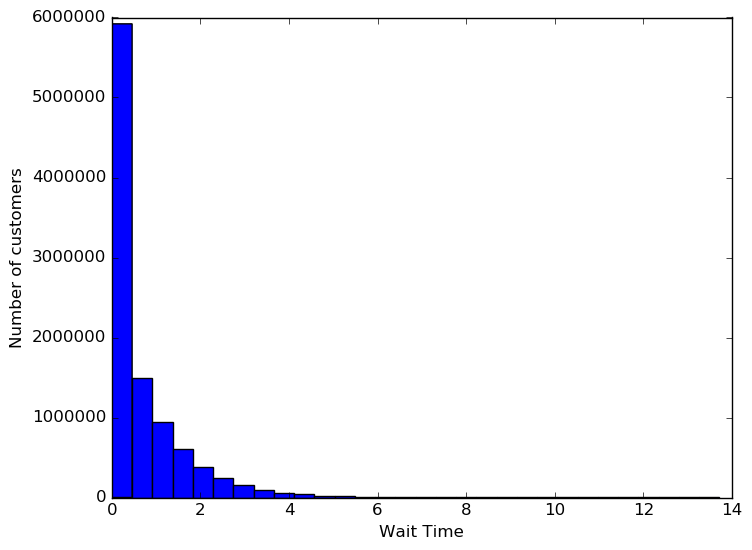

In [26]:
que_gn=customer_queue_gen(10_000_000,3,2)
wait_time_list=service_processing_two_stations_gen(que_gn) 
ax=axes();
ax[:hist](wait_time_list,30); ylabel("Number of customers"); xlabel("Wait Time");

The results are almost identical to the one we saw before

In [27]:
que_gn=customer_queue_gen(10_000_000,3,2)
@time service_processing_two_stations_gen(que_gn);

  1.857716 seconds (50.00 M allocations: 1.048 GB, 10.01% gc time)


Our generator induced a bit of memory overhead, but it is significantly faster. 

# Queueing M/M/c with FIFO

Here we extend our previous code to cover the case where we have any number of service stations. 

In [28]:
function service_processing_c_stations_gen(queue_gen::Base.Generator,c)
    t_next_customer_at=zeros(c)
    wait_time_list=Float64[]
    for qc in queue_gen
        current_station=indmin(t_next_customer_at)
        t_next_customer_at[current_station]=max(t_next_customer_at[current_station],qc.time)
        wait_time=t_next_customer_at[current_station]-qc.time
        push!(wait_time_list,wait_time)
        t_next_customer_at[current_station]+=qc.service_time
    end
    wait_time_list
end

service_processing_c_stations_gen (generic function with 1 method)

Doing a verification for $c=2$. 

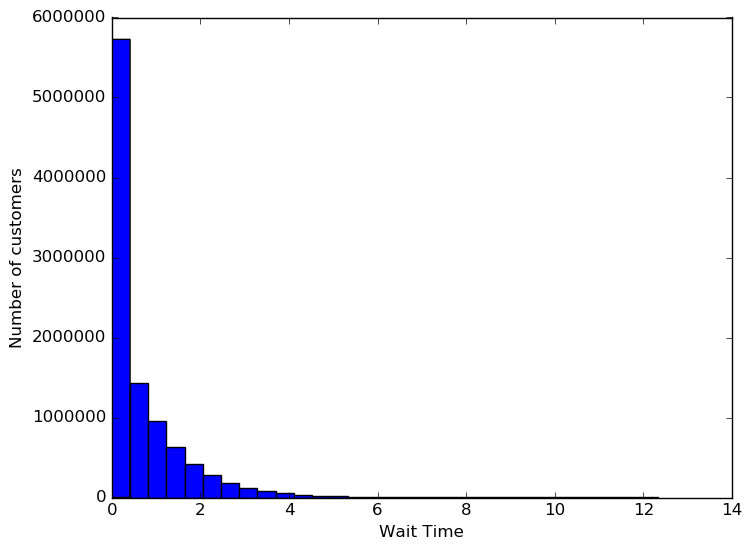

In [29]:
que_gn=customer_queue_gen(10_000_000,3,2)
wait_time_list=service_processing_c_stations_gen(que_gn,2) 
ax=axes();
ax[:hist](wait_time_list,30); ylabel("Number of customers"); xlabel("Wait Time");

The distribution here is identical.  

## Tasks to explore
1. Extent to code to cover the concept of service station utilization. 
2. Customers arrive at a food stand (single server)  at a rate of 100 per hour and take 30 seconds to be served.
    * How much time waiting in line?
    * How much time do they spend at the food stand?
    * How many customers standing in line?
    * What is the server utilization?
3. If the food stand added an extra server, how would the results change. 
4. Repeat the above with 3 servers, but with an arrival rate of 300 per hours. 
5. Repeat the above, but with people quiting the queue if the queue length exceeds 10. 